# Effect of FIFA Ratings on Team Model

In [1]:
from airsenal.framework.utils import NEXT_GAMEWEEK, session
from airsenal.framework.bpl_interface import (
    get_fitted_team_model,
    get_result_df,
    create_and_fit_team_model,
)
from airsenal.framework.season import CURRENT_SEASON, get_teams_for_season

import pickle
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
season = CURRENT_SEASON
gameweek = NEXT_GAMEWEEK

teams = get_teams_for_season(season, session)

## Normal Model with FIFA Ratings as Covariates

In [3]:
model_fifa = get_fitted_team_model(season, gameweek, session)

Fitting team model...


In [4]:
def plot_team_ratings(model):
    # extract indices of current premier league teams
    # val-1 because 1-indexed in model but 0-indexed in python
    current_idx = {key: val-1 for key, val in model.team_indices.items()
                   if key in teams}

    a_mean = model.a.mean(axis=0)
    b_mean = model.b.mean(axis=0)

    a_conf95 = np.abs(np.quantile(model.a,[0.025, 0.975], axis=0) - a_mean)
    b_conf95 = np.abs(np.quantile(model.b, [0.025, 0.975], axis=0) - b_mean)
    a_conf80 = np.abs(np.quantile(model.a,[0.1, 0.9], axis=0) - a_mean)
    b_conf80 = np.abs(np.quantile(model.b, [0.1, 0.9], axis=0) - b_mean)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(aspect='equal')
    plt.errorbar(a_mean[list(current_idx.values())],
                 b_mean[list(current_idx.values())],
                 xerr=a_conf80[:, list(current_idx.values())],
                 yerr=b_conf80[:, list(current_idx.values())],
                 marker='o', markersize=10,
                 linestyle='', linewidth=0.5)
    plt.xlabel('Attack (~Rate Goals Scored)', fontsize=14)
    plt.ylabel('Defence (~Rate Goals Conceded)', fontsize=14)

    for team, idx in current_idx.items():
        ax.annotate(team,
                    (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                    fontsize=12)


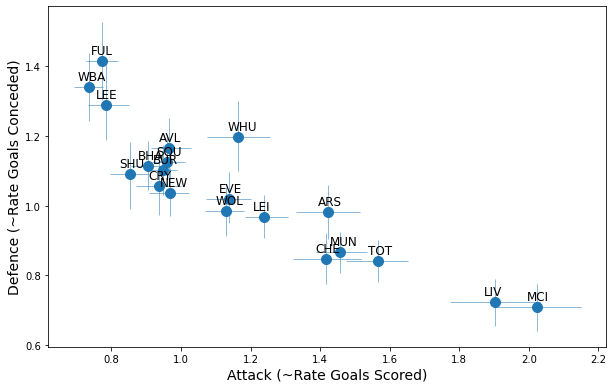

In [5]:
plot_team_ratings(model_fifa)

## Model without FIFA Ratings as Covariates

In [6]:
def fit_nofifa(season, gameweek, session):
    df_team = get_result_df(season, gameweek, session)
    df_X = None
    teams = get_teams_for_season(season, session)
    model_nofifa = create_and_fit_team_model(df_team, None, teams=teams)
    return model_nofifa


model_nofifa = fit_nofifa(season, gameweek, session)

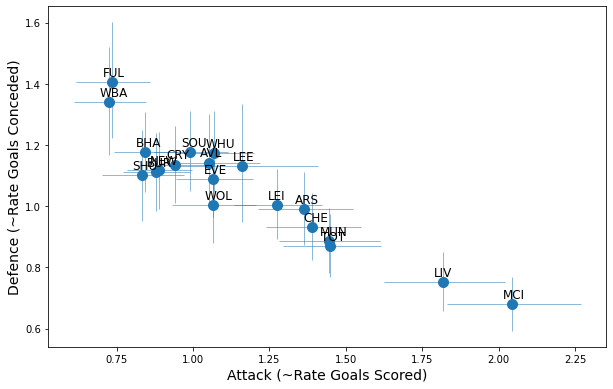

In [7]:
plot_team_ratings(model_nofifa)

## Difference

In [8]:
a_fifa = model_fifa.a.mean(axis=0)
b_fifa = model_fifa.b.mean(axis=0)

a_nofifa = model_nofifa.a.mean(axis=0)
b_nofifa = model_nofifa.b.mean(axis=0)

a_diff = a_fifa - a_nofifa
b_diff = b_fifa - b_nofifa

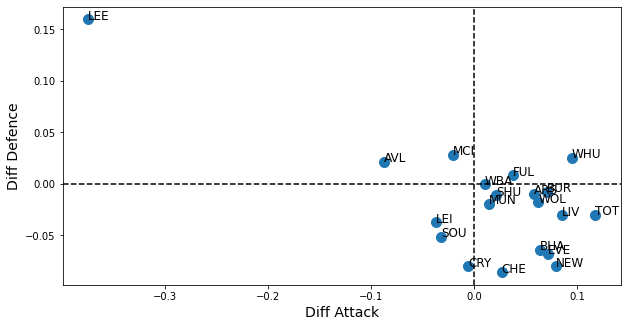

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(aspect='equal')

current_idx = {key: val-1 for key, val in model_fifa.team_indices.items()
               if key in teams}

plt.plot(
    a_diff[list(current_idx.values())],    
    b_diff[list(current_idx.values())],
    marker='o', markersize=10,
    linestyle='', linewidth=0.5
)
plt.xlabel('Diff Attack', fontsize=14)
plt.ylabel('Diff Defence', fontsize=14)

for team, idx in current_idx.items():
    ax.annotate(team,
                (a_diff[idx], b_diff[idx]), 
                fontsize=12)

plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")

- Diff Attack > 0: Including FIFA ratings causes team to have a stronger attack.
- Diff Defence > 0: Including FIFA ratings causes team to have a weaker defence.

## Change during the season (slow!)

Fit team models for multiple gameweeks in a season with an without FIFA ratings as covariates.

In [71]:
gameweeks = range(1, 39)
season = "1819"

models_fifa = {}
models_nofifa =  {}
for gameweek in gameweeks:
    print(gameweek)
    models_fifa[gameweek] = get_fitted_team_model(season, gameweek, session)
    models_nofifa[gameweek] = fit_nofifa(season, gameweek, session)

with open(f"models_fifa_{season}.pkl", "wb") as f:
    pickle.dump(models_fifa, f)
    
with open(f"models_nofifa_{season}.pkl", "wb") as f:
    pickle.dump(models_nofifa, f)

1
Fitting team model...
Adding new team AVL with covariates
Adding new team NOR with covariates
Adding new team SHU with covariates
Adding new team AVL without covariates
Adding new team NOR without covariates
Adding new team SHU without covariates
2
Fitting team model...


3
Fitting team model...
4
Fitting team model...
5
Fitting team model...
6
Fitting team model...
7
Fitting team model...
8
Fitting team model...
9
Fitting team model...
10
Fitting team model...
11
Fitting team model...
12
Fitting team model...
13
Fitting team model...
14
Fitting team model...
15
Fitting team model...
16
Fitting team model...
17
Fitting team model...
18
Fitting team model...
19
Fitting team model...
20
Fitting team model...
21
Fitting team model...
22
Fitting team model...
23
Fitting team model...
24
Fitting team model...
25
Fitting team model...
26
Fitting team model...
27
Fitting team model...
28
Fitting team model...
29
Fitting team model...
39
Fitting team model...
40
Fitting team model...
41
Fitting team model...
42
Fitting team model...
43
Fitting team model...
44
Fitting team model...
45
Fitting team model...
46
Fitting team model...
47
Fitting team model...


In [56]:
team_h = "AVL"
team_a = "ARS"


"""
score_h = 1
score_a = 0

print("--- FIFA ---")
print(f"{team_h} {score_h}", model_fifa.score_n_probability(score_h, team_h, team_a, home=True))
print(f"{team_a} {score_a}", model_fifa.score_n_probability(score_a, team_a, team_h, home=False))
print("--- NO FIFA ---")
print(f"{team_h} {score_h}", model_nofifa.score_n_probability(score_h, team_h, team_a, home=True))
print(f"{team_a} {score_a}", model_nofifa.score_n_probability(score_a, team_a, team_h, home=False))
"""

'\nscore_h = 1\nscore_a = 0\n\nprint("--- FIFA ---")\nprint(f"{team_h} {score_h}", model_fifa.score_n_probability(score_h, team_h, team_a, home=True))\nprint(f"{team_a} {score_a}", model_fifa.score_n_probability(score_a, team_a, team_h, home=False))\nprint("--- NO FIFA ---")\nprint(f"{team_h} {score_h}", model_nofifa.score_n_probability(score_h, team_h, team_a, home=True))\nprint(f"{team_a} {score_a}", model_nofifa.score_n_probability(score_a, team_a, team_h, home=False))\n'

In [57]:
def exp_goals(prob_goals, max_goals):
    return sum([n*prob_goals[n] for n in range(max_goals)])/sum(prob_goals)

In [58]:
max_goals = 8

goals_h_fifa = {}
goals_h_nofifa = {}
goals_a_fifa = {}
goals_a_nofifa = {}

mean_goals_h_fifa = {}
mean_goals_a_fifa = {}
mean_goals_h_nofifa = {}
mean_goals_a_nofifa = {}

for gameweek in gameweeks:
    print(gameweek)
    model_fifa = models_fifa[gameweek]
    model_nofifa = models_nofifa[gameweek]

    print("--- FIFA ---")
    prob_score_h_fifa = [model_fifa.score_n_probability(n, team_h, team_a) for n in range(max_goals)]
    exp_h_fifa = exp_goals(prob_score_h_fifa, max_goals)
    print(team_h, "exp goals", exp_h_fifa)
    prob_score_a_fifa = [model_fifa.score_n_probability(n, team_a, team_h, home=False) for n in range(max_goals)]
    exp_a_fifa = exp_goals(prob_score_a_fifa, max_goals)
    print(team_a, "exp goals", exp_a_fifa)

    print("--- NO FIFA ---")
    prob_score_h_nofifa = [model_nofifa.score_n_probability(n, team_h, team_a) for n in range(max_goals)]
    exp_h_nofifa = exp_goals(prob_score_h_nofifa, max_goals)
    print(team_h, "exp goals", exp_h_nofifa)
    prob_score_a_nofifa = [model_nofifa.score_n_probability(n, team_a, team_h, home=False) for n in range(max_goals)]
    exp_a_nofifa = exp_goals(prob_score_a_nofifa, max_goals)
    print(team_a, "exp goals", exp_a_nofifa)

    goals_h_fifa[gameweek] = prob_score_h_fifa
    goals_h_nofifa[gameweek] = prob_score_h_nofifa
    goals_a_fifa[gameweek] = prob_score_a_fifa
    goals_a_nofifa[gameweek] = prob_score_a_nofifa
    
    mean_goals_h_fifa[gameweek] = exp_h_fifa
    mean_goals_a_fifa[gameweek] = exp_a_fifa
    mean_goals_h_nofifa[gameweek] = exp_h_nofifa
    mean_goals_a_nofifa[gameweek] = exp_a_nofifa


1
--- FIFA ---
AVL exp goals 1.1666618425181274
ARS exp goals 1.7486354557528077
--- NO FIFA ---
AVL exp goals 1.1207189350882343
ARS exp goals 1.7495502134433276
2
--- FIFA ---
AVL exp goals 1.158938332326735
ARS exp goals 1.7562909229239754
--- NO FIFA ---
AVL exp goals 1.1180099416783225
ARS exp goals 1.7571696314774485
3
--- FIFA ---
AVL exp goals 1.167576296994874
ARS exp goals 1.7514541801026426
--- NO FIFA ---
AVL exp goals 1.1198825881465722
ARS exp goals 1.7518149150167057
4
--- FIFA ---
AVL exp goals 1.179996426686885
ARS exp goals 1.7408871789615603
--- NO FIFA ---
AVL exp goals 1.1528435400392214
ARS exp goals 1.7242771984098035
5
--- FIFA ---
AVL exp goals 1.1843892379145746
ARS exp goals 1.7352582731584951
--- NO FIFA ---
AVL exp goals 1.2629239493606774
ARS exp goals 1.668400932126489
6
--- FIFA ---
AVL exp goals 1.179267348967715
ARS exp goals 1.7286541195932423
--- NO FIFA ---
AVL exp goals 1.2596471288126065
ARS exp goals 1.643113588137289
7
--- FIFA ---
AVL exp goals

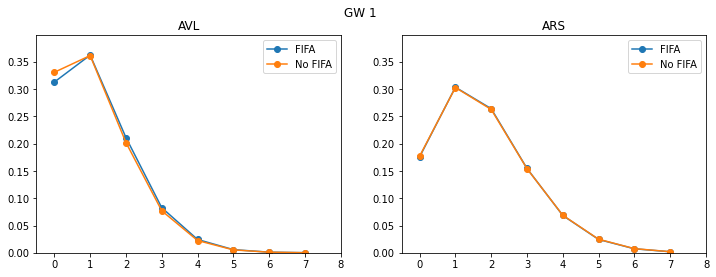

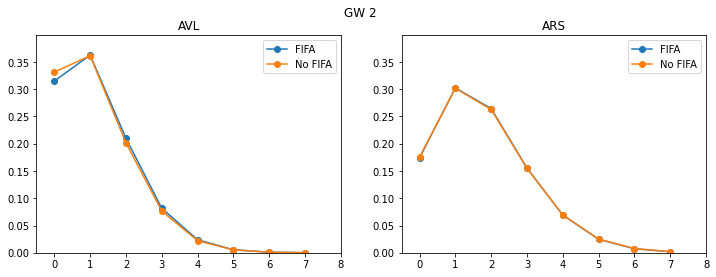

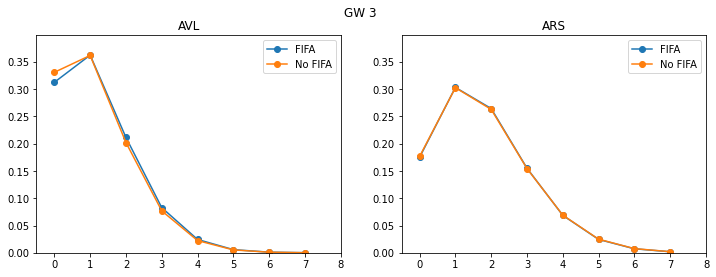

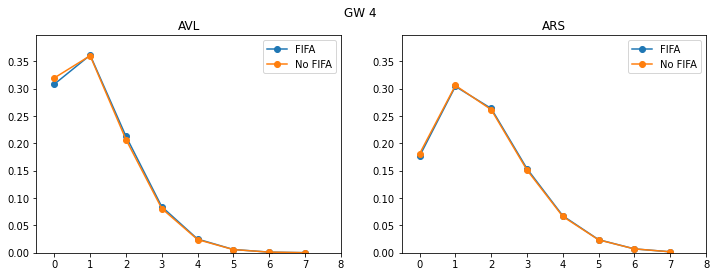

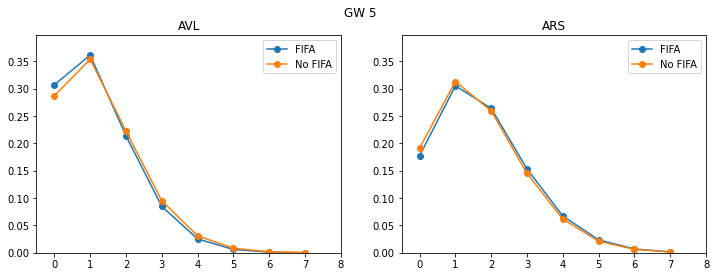

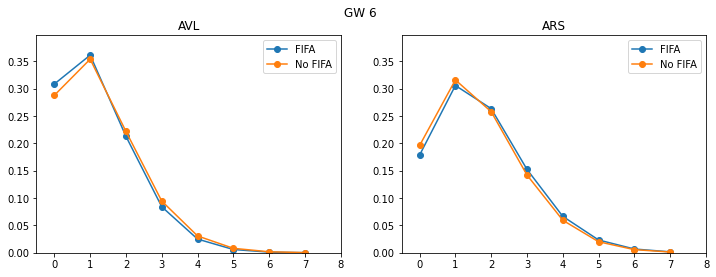

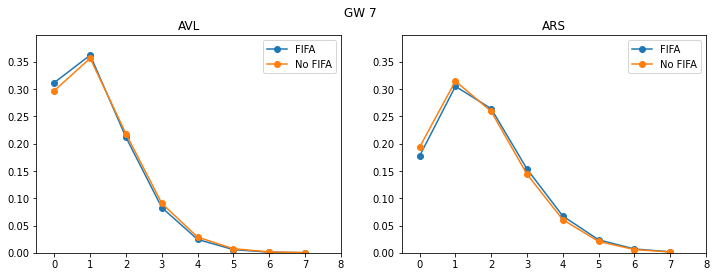

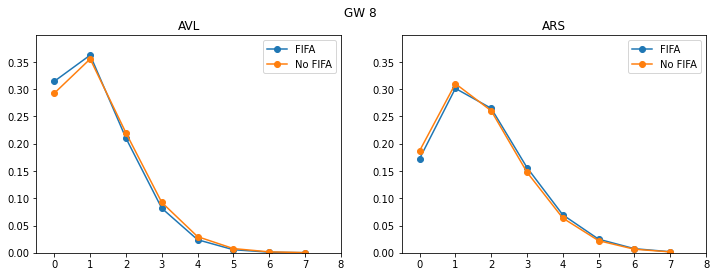

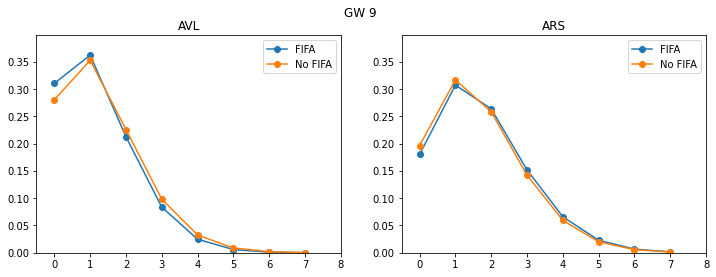

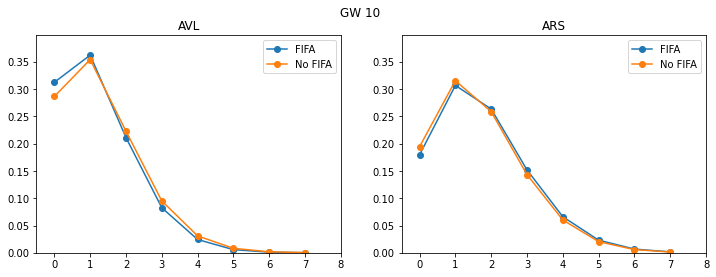

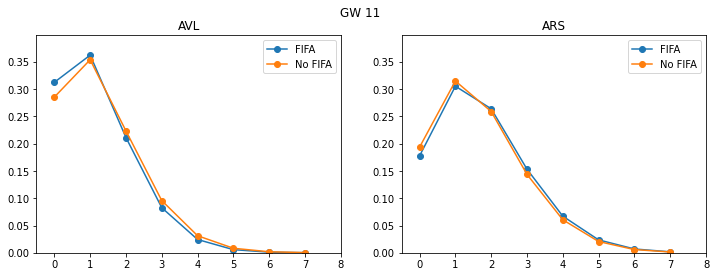

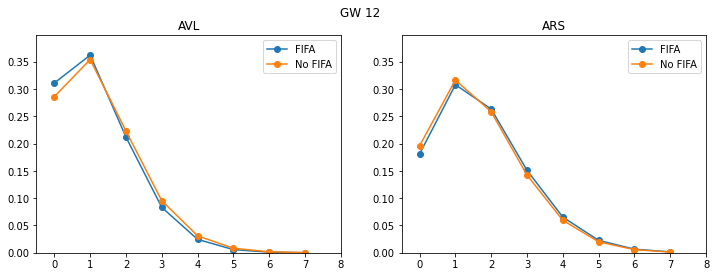

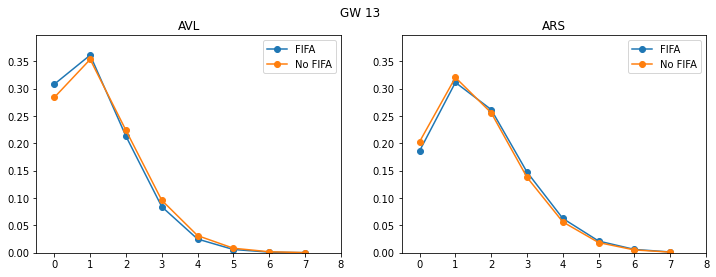

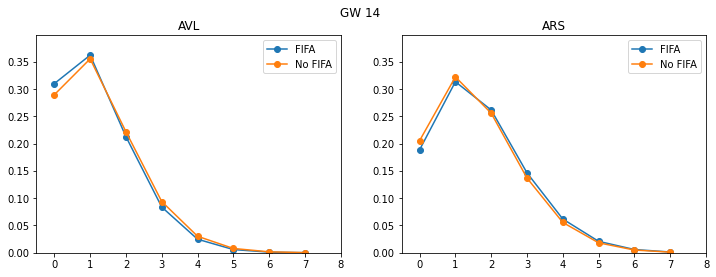

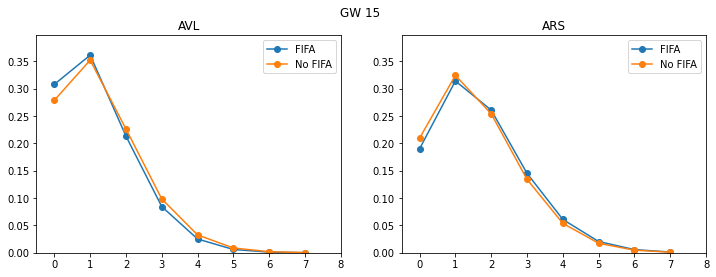

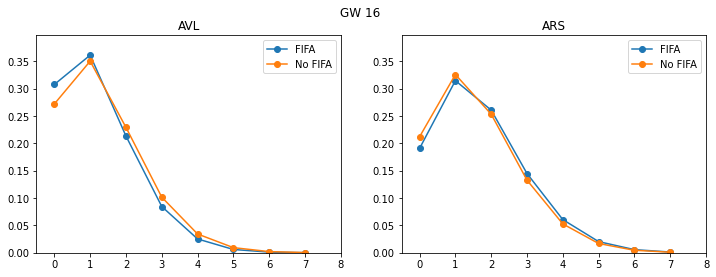

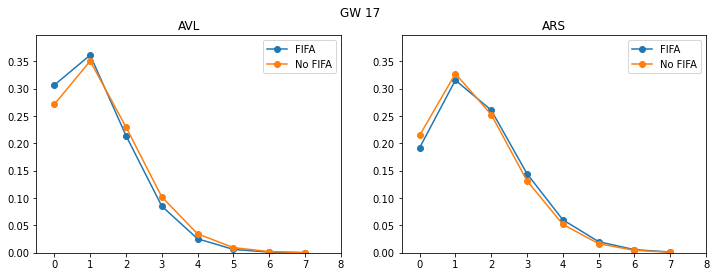

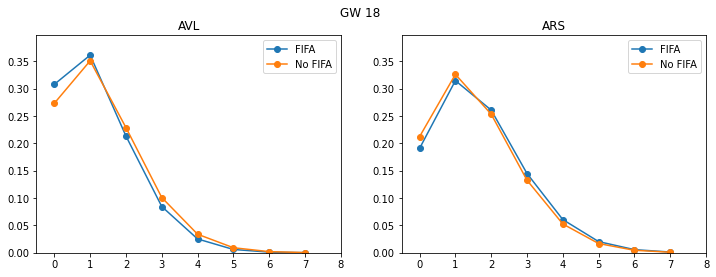

In [59]:
for gameweek in gameweeks:
    
    prob_score_h_fifa = goals_h_fifa[gameweek]
    prob_score_h_nofifa = goals_h_nofifa[gameweek]
    prob_score_a_fifa = goals_a_fifa[gameweek]
    prob_score_a_nofifa = goals_a_nofifa[gameweek]

    max_prob = 1.1 * max(
        prob_score_h_fifa +
        prob_score_a_fifa +
        prob_score_h_nofifa +
        prob_score_a_nofifa
    )

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(range(max_goals), prob_score_h_fifa, "-o", label="FIFA")
    plt.plot(range(max_goals), prob_score_h_nofifa, "-o", label="No FIFA")
    plt.ylim([0, max_prob])
    plt.xlim([-0.5, max_goals])
    plt.title(team_h)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(max_goals), prob_score_a_fifa, "-o", label="FIFA")
    plt.plot(range(max_goals), prob_score_a_nofifa, "-o", label="No FIFA")
    plt.ylim([0, max_prob])
    plt.xlim([-0.5, max_goals])
    plt.title(team_a)
    plt.legend()
    
    plt.suptitle(f"GW {gameweek}")

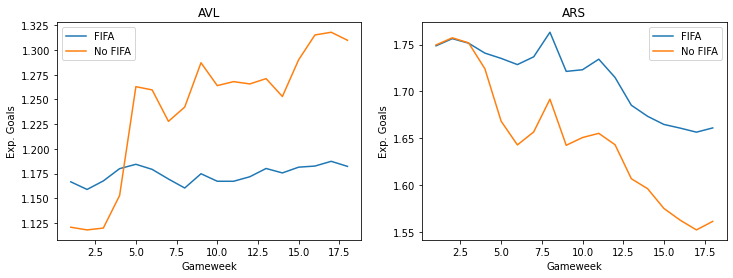

In [60]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(mean_goals_h_fifa.keys(), mean_goals_h_fifa.values(), label="FIFA")
plt.plot(mean_goals_h_nofifa.keys(), mean_goals_h_nofifa.values(), label="No FIFA")
plt.xlabel("Gameweek")
plt.ylabel("Exp. Goals")
plt.title(team_h)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mean_goals_a_fifa.keys(), mean_goals_a_fifa.values(), label="FIFA")
plt.plot(mean_goals_a_nofifa.keys(), mean_goals_a_nofifa.values(), label="No FIFA")
plt.xlabel("Gameweek")
plt.ylabel("Exp. Goals")
plt.title(team_a)
plt.legend()


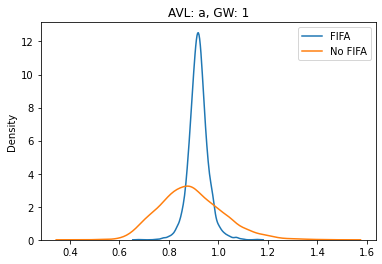

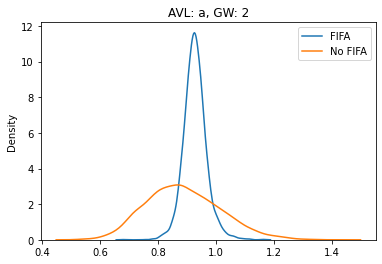

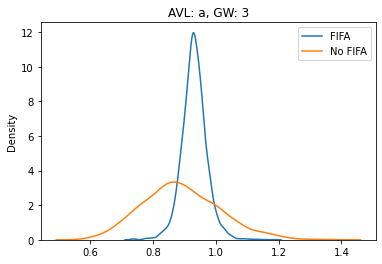

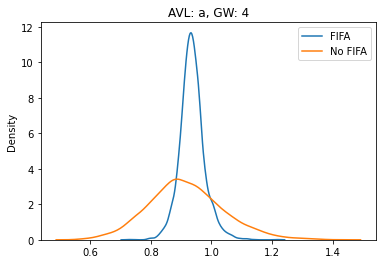

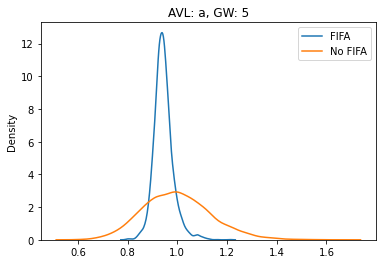

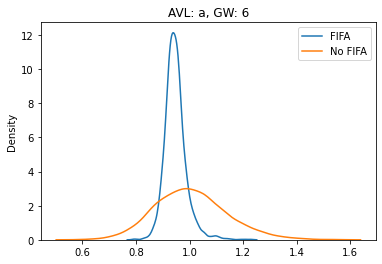

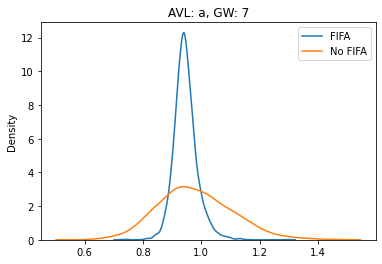

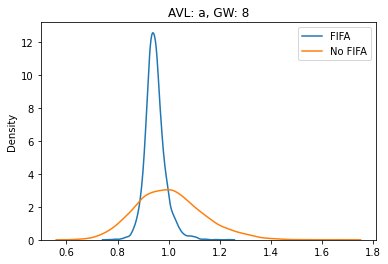

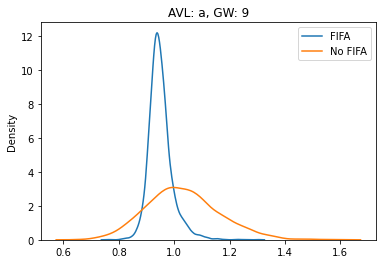

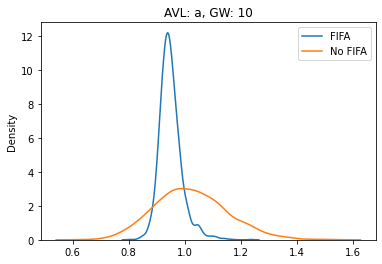

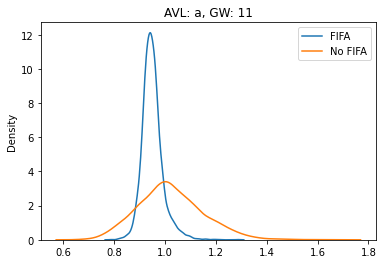

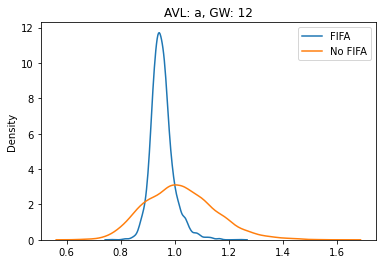

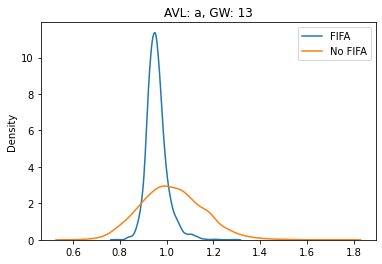

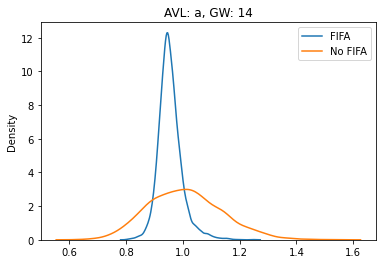

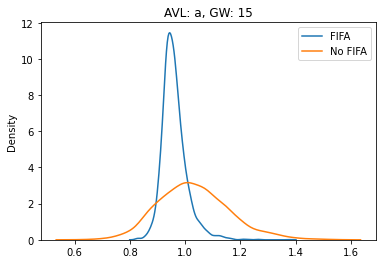

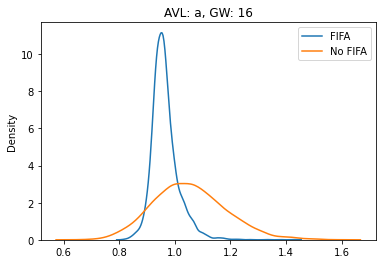

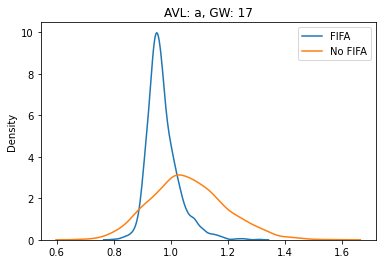

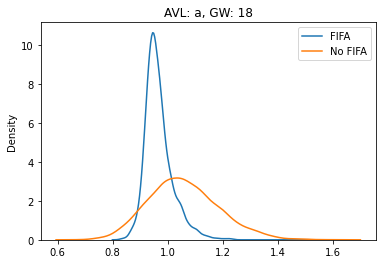

In [61]:

for gameweek in gameweeks:
    team_idx = {key: val-1 for key, val in models_fifa[gameweek].team_indices.items()}
    plt.figure()
    sns.kdeplot(models_fifa[gameweek].a[:, team_idx[team_h]], label="FIFA")
    sns.kdeplot(models_nofifa[gameweek].a[:, team_idx[team_h]], label="No FIFA")
    plt.title(f"{team_h}: a, GW: {gameweek}")
    plt.legend()


In [62]:
a_mean = models_fifa[gameweek].a.mean(axis=0)
b_mean = models_fifa[gameweek].b.mean(axis=0)

a_conf95 = np.abs(np.quantile(models_fifa[gameweek].a,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(models_fifa[gameweek].b, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(models_fifa[gameweek].a,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(models_fifa[gameweek].b, [0.1, 0.9], axis=0) - b_mean)
